In [2]:
import qiskit

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.2',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.2'}

In [4]:
from qiskit import IBMQ


In [5]:
IBMQ.save_account('33972081998a119a96b8f6dddb6c428c06ca1d09504cc9fbea0b5de0fddfb5ec516468d07f2a9423bcc269a74a47f620eb54de27701739d218b80673bbbaa118')

configrc.store_credentials:WARNING:2021-01-12 20:53:22,290: Credentials already present. Set overwrite=True to overwrite.


In [6]:
IBMQ.load_account()

/Users/juanacuna/opt/anaconda3/envs/env/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
from qiskit import *

In [8]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)

In [9]:
circuit=QuantumCircuit(qr,cr)

In [10]:
%matplotlib inline


In [11]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [12]:
circuit.h(qr[0])

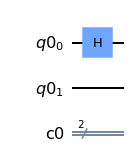

In [13]:
circuit.draw(output='mpl')

In [14]:
circuit.cx(qr[0],qr[1])

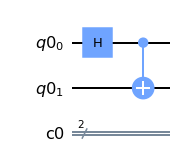

In [15]:
circuit.draw(output='mpl')

In [16]:
circuit.measure(qr,cr)

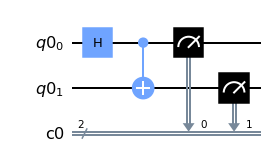

In [17]:
circuit.draw(output='mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')

In [24]:
result= execute(circuit, backend=simulator).result()

In [25]:
from qiskit.tools.visualization import plot_histogram

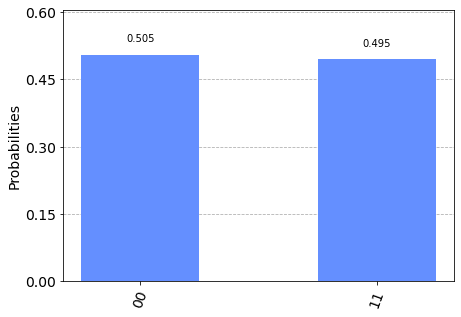

In [26]:
plot_histogram(result.get_counts(circuit))

In [27]:
IBMQ.load_account()

/Users/juanacuna/opt/anaconda3/envs/env/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-12 21:07:10,640: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
provider = IBMQ.get_provider('ibm-q')

In [29]:
qcomp= provider.get_backend('ibmq_16_melbourne')

In [30]:
job=execute(circuit,backend=qcomp)

In [31]:
from qiskit.tools.monitor import job_monitor

In [32]:
job_monitor(job)

Job Status: job has successfully run


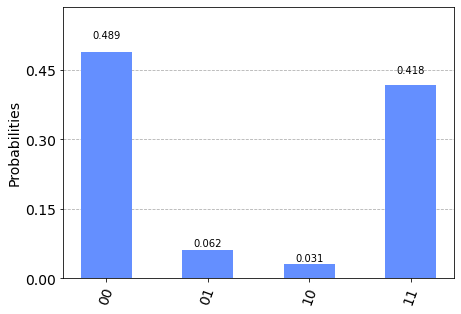

In [33]:
result= job.result()
plot_histogram(result.get_counts(circuit))